# **Predictive Analytics: Shinkansen Passenger Satisfaction**

## Data Preprocessing

**1. Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter("ignore")

**2. Load the training and test data separately**

In [2]:
#train data
surveydata_train = pd.read_csv("Surveydata_train.csv")
traveldata_train = pd.read_csv("Traveldata_train.csv")
#test data
surveydata_test = pd.read_csv("Surveydata_test.csv")
traveldata_test = pd.read_csv("Traveldata_test.csv")

**3. Understand the data (check for each of the following in both the train and test dataset)**
<ol>
<li>Check a sample of the data</li>
<li>Use the info() and describe() functions for more information</li>
<li>Look for the presence of null values in the dataset</li>
<li>Look for the presence of bad data or unwanted characters like "$" or "#" in the numerical columns</li>
</ol>

In [3]:
#A. Check a sample of the data
surveydata_train.sample(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
90741,98890742,1,Poor,Green Car,Poor,Poor,Inconvenient,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Excellent
32748,98832749,0,Needs Improvement,Ordinary,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Acceptable,Good,Needs Improvement,Acceptable
68703,98868704,1,Acceptable,Green Car,Acceptable,NaN,Manageable,Good,Good,Acceptable,Good,Good,Good,Needs Improvement,Acceptable,Needs Improvement,Good
29661,98829662,1,Excellent,Green Car,Extremely Poor,Excellent,Manageable,Needs Improvement,Excellent,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent,Acceptable,Excellent,Needs Improvement
11033,98811034,1,Excellent,Green Car,Excellent,Excellent,Very Convenient,Good,Good,Good,Good,Needs Improvement,Acceptable,Good,Acceptable,Acceptable,Good


In [4]:
#A. Check a sample of the data
traveldata_train.sample(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
86129,98886130,Female,Loyal Customer,41.0,Business Travel,Eco,2177,0.0,0.0
60981,98860982,Male,Loyal Customer,41.0,Personal Travel,Eco,2217,0.0,0.0
86307,98886308,Male,Disloyal Customer,35.0,Business Travel,Eco,2191,0.0,0.0
83051,98883052,Male,Loyal Customer,33.0,Personal Travel,Eco,1493,2.0,5.0
25197,98825198,Male,Loyal Customer,70.0,Personal Travel,Eco,1812,0.0,0.0


In [5]:
#B. Use the info() and describe() functions for more information
surveydata_train.info()
surveydata_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [6]:
#B. Use the info() and describe() functions for more information
traveldata_train.info()
traveldata_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [7]:
#C. Look for the presence of null values in the dataset
surveydata_train.isnull().values.any()

True

In [8]:
#C. Look for the presence of null values in the dataset
traveldata_train.isnull().values.any()

True

In [9]:
#D. Look for the presence of bad data or unwanted characters like "$" or "#" in the numerical columns
surveydata_train.describe().columns.astype(str).str.contains("($|#)").any()

True

In [10]:
#D. Look for the presence of bad data or unwanted characters like "$" or "#" in the numerical columns
traveldata_train.describe().columns.astype(str).str.contains("($|#)").any()

True

**4. Clean the data**
<ol>
<li>Treat for missing values in both the train & test set</li>
<li>Remove bad data values in both the train & test set</li>
<li>Encode the categorical object variables in both the train & test set</li>
<li>Perform Feature Engineering if necessary</li>
<li>Scale/Normalize the dataset if necessary</li>
</ol>

In [11]:
def dataframe_cleaning(df):
    # Before cleaning any data, it is important to transform Categorical values to numerical values
    # Retrieve categorical columns, which have data type as "object"
    df_object_columns = df.select_dtypes(include=['object']).columns
    # One-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, columns=df_object_columns, dummy_na=True)
    #A. Treat for missing values in both the train & test set
    imputer = KNNImputer(n_neighbors=15)
    #np array is created
    df_imputed = imputer.fit_transform(df_encoded)
    #back to dataframe
    df_without_nans = pd.DataFrame(data=df_imputed, columns=df_encoded.columns)
    
    return df_without_nans

In [12]:
#train data
surveydata_train_clean = dataframe_cleaning(surveydata_train)
traveldata_train_clean = dataframe_cleaning(traveldata_train)
#test data
surveydata_test_clean = dataframe_cleaning(surveydata_test)
traveldata_test_clean = dataframe_cleaning(traveldata_test)

In [13]:
#if a column is not present on the test set, then it is not important in the train set. Sans the target variable "Overall_Experience"
def shape_equalizer(df1, df2):
    """train, then test"""
    df1_columns = df1.columns
    df2_columns = df2.columns
    difference = list(set(df1_columns).difference(set(df2_columns)))
    if "Overall_Experience" in difference:
        difference.pop(difference.index("Overall_Experience"))
    df1 = df1.drop(difference, axis=1)
    return df1, df2

In [14]:
#survey data
surveydata_train_equalized, surveydata_test_equalized = shape_equalizer(surveydata_train_clean, surveydata_test_clean)
#travel data
traveldata_train_equalized, traveldata_test_equalized = shape_equalizer(traveldata_train_clean, traveldata_test_clean)

In [15]:
if surveydata_train_equalized.shape[0] == traveldata_train_equalized.shape[0] and surveydata_test_equalized.shape[0] == traveldata_test_equalized.shape[0]:
    print("Same number of rows between survey and travel data sets.")

Same number of rows between survey and travel data sets.


In [16]:
# -1 due to target column "Overall_Experience"
if surveydata_train_equalized.shape[1]-1 == surveydata_test_equalized.shape[1] and traveldata_train_equalized.shape[1] == traveldata_test_equalized.shape[1]:
    print("Same number of columns between test and train data sets.")

Same number of columns between test and train data sets.


In [17]:
#last, join the two datasets for train and the two datasets for test
#train
train_data = traveldata_train_equalized.merge(surveydata_train_equalized, on='ID')
#test
test_data = traveldata_test_equalized.merge(surveydata_test_equalized, on='ID')

## Model Building

In [18]:
# train, test, split for all
X = train_data.drop('Overall_Experience', axis=1)
y = train_data['Overall_Experience']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# save function for all
def results_to_csv(y_pred, var_name):
    data = test_data.copy()
    data['Overall_Experience'] = y_pred
    result = data[['ID', 'Overall_Experience']]
    #to integers
    result[['ID', 'Overall_Experience']] = result[['ID', 'Overall_Experience']].astype(int)
    #print head
    print(result.head(5))
    #save as csv
    name = "_".join(var_name.split('_')[-2:]) + '_result.csv'
    return result.to_csv(name, index=False)

#### random forest

In [20]:
# Fit the model
random_forest_model = RandomForestClassifier(n_estimators=2500,   # Number of trees
                                              criterion='gini',   # How to train the trees. Also can be "entropy".
                                              max_depth=None,     # Max depth of the trees. Not necessary to change. 
                                              min_samples_split=2, # Minimum samples to create a split
                                              min_samples_leaf=1,  # Minimum samples in a leaf. 
                                              min_weight_fraction_leaf=0.0, # Minimum fraction of samples in a leaf. 
                                              max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars) for classification and vars for regression
                                              max_leaf_nodes=16, # Maximum number of nodes.
                                              min_impurity_decrease=0.0, # Minimum impurity decrease. This is 10^(-5) by default. If the impurity decrease is smaller than this value, the node will not be split
                                              bootstrap=True, # Whether bootstrap samples are used when building trees.
                                              oob_score=False,  # Whether to use out-of-bag samples to estimate the generalization accuracy
                                              n_jobs=-1,      # The number of jobs to run in parallel for both fit and predict
                                              random_state=42, # Random seed
                                              verbose=0,         # Controls the verbosity when fitting and predicting
                                              warm_start=False,   # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                                              class_weight=None   # Weights associated with classes. 
                                             )
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_split=3, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [21]:
# Train the model
y_pred_train_random_forest = random_forest_model.predict(X_train)

In [22]:
# Evaluate model on training data
print(confusion_matrix(y_train, y_pred_train_random_forest))

[[34380     1]
 [    6 41116]]


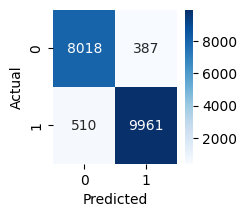

In [23]:
# Make predictions on validation data
y_pred_val_random_forest = random_forest_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val_random_forest)
#pretty plot
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels (depends on your problem)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [24]:
[[TN,FP],[FN,TP]] = cm
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)
maybe_acc = Accuracy - 0.003
target = 0.9521094
print(f"cm:\n{cm}\nAccuracy:\t{Accuracy:.7f}\nPrecision:\t{Precision:.7f}\nRecall:\t\t{Recall:.7f}\nF1_score:\t{F1_score:.7f}\n\nMaybe Acc:\t{maybe_acc:.7f}\nTarget:\t\t{target:.7f}")


cm:
[[8018  387]
 [ 510 9961]]
Accuracy:	0.9524793
Precision:	0.9626015
Recall:		0.9512941
F1_score:	0.9569144

Maybe Acc:	0.9494793
Target:		0.9521094


In [25]:
# Make prediction
y_pred_test_random_forest = random_forest_model.predict(test_data)
y_pred_test_random_forest

array([1., 1., 1., ..., 0., 1., 0.])

In [26]:
results_to_csv(y_pred_test_random_forest, "y_pred_test_random_forest")

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


## Best model

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [31]:
# Get the best parameters
best_params = rf_random.best_params_
best_params


{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': False}

In [32]:
# Get the best estimator
best_model = rf_random.best_estimator_
best_model

RandomForestClassifier(bootstrap=False, n_estimators=2000)

In [43]:
# This will print a dictionary of all the parameters of the best model.
top_params = best_model.get_params()
print(top_params)


{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [33]:
# Fit the model
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=2000)

In [34]:
# Train the model
y_pred_train_best_model = best_model.predict(X_train)

In [35]:
# Evaluate model on training data
print(confusion_matrix(y_train, y_pred_train_best_model))

[[34381     0]
 [    0 41122]]


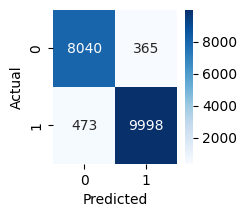

In [36]:
# Make predictions on validation data
y_pred_val_best_model = best_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val_best_model)
#pretty plot
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels (depends on your problem)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [37]:
[[TN,FP],[FN,TP]] = cm
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)
maybe_acc = Accuracy - 0.003
target = 0.9521094
print(f"cm:\n{cm}\nAccuracy:\t{Accuracy:.7f}\nPrecision:\t{Precision:.7f}\nRecall:\t\t{Recall:.7f}\nF1_score:\t{F1_score:.7f}\n\nMaybe Acc:\t{maybe_acc:.7f}\nTarget:\t\t{target:.7f}")


cm:
[[8040  365]
 [ 473 9998]]
Accuracy:	0.9556050
Precision:	0.9647785
Recall:		0.9548276
F1_score:	0.9597773

Maybe Acc:	0.9526050
Target:		0.9521094


In [38]:
# Make prediction
y_pred_test_best_model = best_model.predict(test_data)
y_pred_test_best_model

array([1., 1., 1., ..., 0., 1., 0.])

In [39]:
results_to_csv(y_pred_test_best_model, "y_pred_test_best_model")

         ID  Overall_Experience
0  99900001                   1
1  99900002                   1
2  99900003                   1
3  99900004                   0
4  99900005                   1


## new model with best params

In [63]:
#size increment
top_params['n_estimators']=2500 #original is 2000
top_params['criterion']='entropy' #original is 'gini'

In [64]:
# Fit the model
updated_forest_model = RandomForestClassifier(**top_params)
updated_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=2500)

In [65]:
# Train the model
y_pred_train_updated_forest = updated_forest_model.predict(X_train)

In [66]:
# Evaluate model on training data
print(confusion_matrix(y_train, y_pred_train_updated_forest))

[[34381     0]
 [    0 41122]]


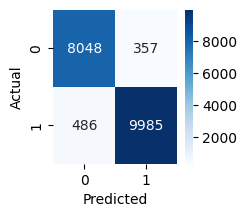

In [67]:
# Make predictions on validation data
y_pred_val_updated_forest = updated_forest_model.predict(X_val)
cm_updated = confusion_matrix(y_val, y_pred_val_updated_forest)
#pretty plot
plt.figure(figsize=(2,2))
sns.heatmap(cm_updated, annot=True, fmt='d', cmap='Blues')

# Add labels (depends on your problem)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [68]:
[[TN,FP],[FN,TP]] = cm_updated
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)
maybe_acc = Accuracy - 0.003
target = 0.9521094
print(f"cm:\n{cm}\nAccuracy:\t{Accuracy:.7f}\nPrecision:\t{Precision:.7f}\nRecall:\t\t{Recall:.7f}\nF1_score:\t{F1_score:.7f}\n\nMaybe Acc:\t{maybe_acc:.7f}\nTarget:\t\t{target:.7f}")


cm:
[[8040  365]
 [ 473 9998]]
Accuracy:	0.9553401
Precision:	0.9654806
Recall:		0.9535861
F1_score:	0.9594965

Maybe Acc:	0.9523401
Target:		0.9521094


In [69]:
# Make prediction
y_pred_test_updated_forest = updated_forest_model.predict(test_data)
y_pred_test_updated_forest

array([1., 1., 1., ..., 0., 1., 0.])